In [1]:
#dataframes
import pandas as pd
pd.set_option('display.max_columns', None)
#operaciones matemáticas
import numpy as np
# visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
wait = pd.read_csv("files/ER_wait_time_clean.csv", index_col = 0)

In [21]:
wait.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Visit Time,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,ER Physician Availability,ER Physician-to-Patient Ratio,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction,Number of Patients
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10,20:20:56,Saturday,Winter,Late Morning,Medium,4,3,1.00,92,17,22,66,105,Discharged,1,3
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28,02:07:47,Thursday,Fall,Evening,Medium,4,0,0.00,38,9,30,30,69,Discharged,3,2
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30,04:02:28,Monday,Fall,Evening,Low,5,1,0.25,38,38,40,125,203,Discharged,1,4
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27,00:31:13,Tuesday,Winter,Evening,High,4,5,1.25,94,8,16,64,88,Discharged,2,4
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06,16:52:26,Wednesday,Spring,Afternoon,Low,4,8,1.33,74,26,29,63,118,Discharged,1,6


In [22]:
wait.shape

(5000, 22)

In [7]:
correlacion1 = wait.corr(method = 'pearson', numeric_only= True)
correlacion1

,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Satisfaction
Nurse-to-Patient Ratio,1.000000,0.002511,0.002937,0.652054,0.646690,0.673622,0.688015,-0.738991
Specialist Availability,0.002511,1.000000,0.503209,0.006500,-0.000512,0.011028,0.006579,-0.014892
Facility Size (Beds),0.002937,0.503209,1.000000,0.003402,-0.012659,0.000980,-0.003578,-0.010528
Time to Registration (min),0.652054,0.006500,0.003402,1.000000,0.857030,0.876695,0.924238,-0.825610
Time to Triage (min),0.646690,-0.000512,-0.012659,0.857030,1.000000,0.875145,0.953604,-0.795599
Time to Medical Professional (min),0.673622,0.011028,0.000980,0.876695,0.875145,1.000000,0.976446,-0.857626
Total Wait Time (min),0.688015,0.006579,-0.003578,0.924238,0.953604,0.976446,1.000000,-0.865145
Patient Satisfaction,-0.738991,-0.014892,-0.010528,-0.825610,-0.795599,-0.857626,-0.865145,1.000000


In [23]:
correlacion2 = wait.corr(method = 'spearman', numeric_only= True)
correlacion2

,Nurse-to-Patient Ratio,ER Physician Availability,ER Physician-to-Patient Ratio,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Satisfaction,Number of Patients
Nurse-to-Patient Ratio,1.000000,0.006502,0.000670,0.004172,0.758550,0.793817,0.764930,0.792017,-0.741376,0.005366
ER Physician Availability,0.006502,1.000000,0.853899,0.548005,0.012410,0.008721,0.015110,0.013184,-0.015546,-0.011268
ER Physician-to-Patient Ratio,0.000670,0.853899,1.000000,0.466897,-0.048369,-0.040245,-0.050282,-0.048386,0.034989,-0.470622
Facility Size (Beds),0.004172,0.548005,0.466897,1.000000,0.010684,0.000024,0.010064,0.006611,-0.009452,0.003035
Time to Registration (min),0.758550,0.012410,-0.048369,0.010684,1.000000,0.920752,0.909536,0.949495,-0.903273,0.115906
Time to Triage (min),0.793817,0.008721,-0.040245,0.000024,0.920752,1.000000,0.920240,0.968859,-0.922360,0.093989
Time to Medical Professional (min),0.764930,0.015110,-0.050282,0.010064,0.909536,0.920240,1.000000,0.985288,-0.936883,0.126788
Total Wait Time (min),0.792017,0.013184,-0.048386,0.006611,0.949495,0.968859,0.985288,1.000000,-0.949523,0.118994
Patient Satisfaction,-0.741376,-0.015546,0.034989,-0.009452,-0.903273,-0.922360,-0.936883,-0.949523,1.000000,-0.093963
Number of Patients,0.005366,-0.011268,-0.470622,0.003035,0.115906,0.093989,0.126788,0.118994,-0.093963,1.000000


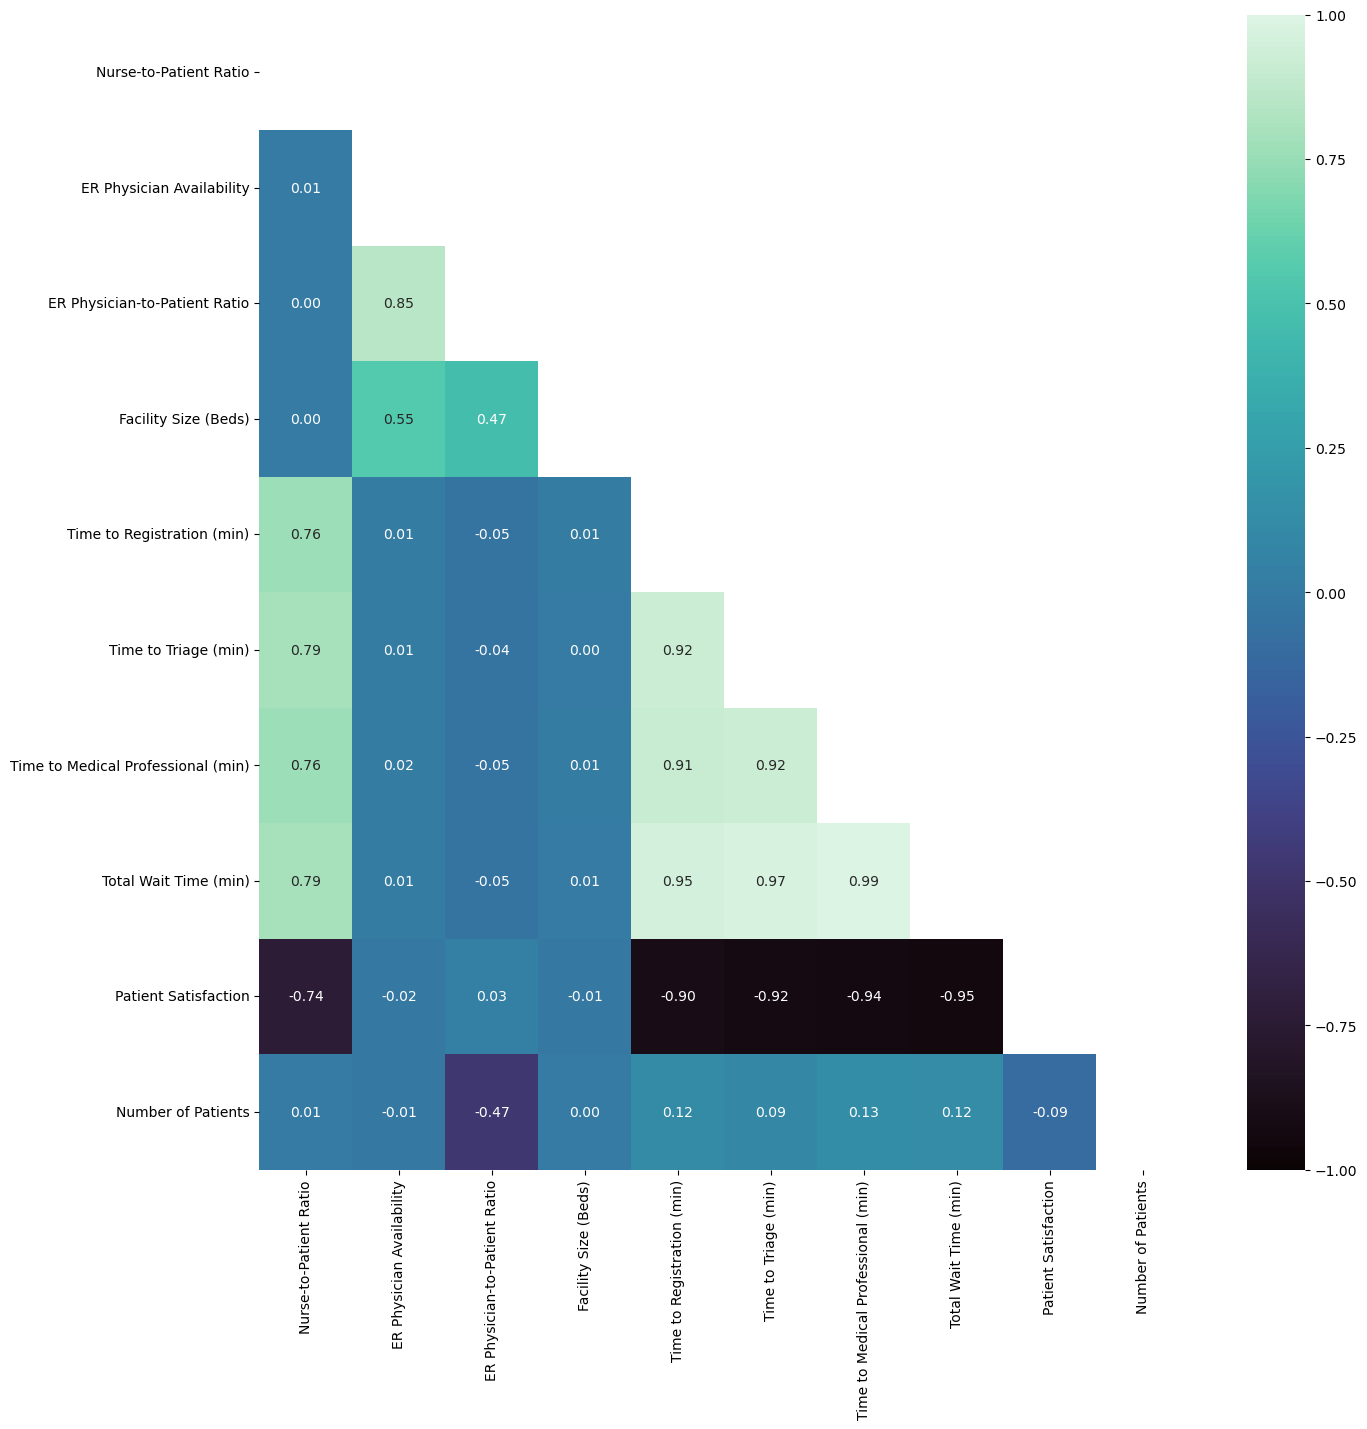

In [24]:
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(correlacion2, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(correlacion2, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [10]:
#calculo de outliers

In [25]:
correlacion2.columns

Index(['Nurse-to-Patient Ratio', 'ER Physician Availability',
       'ER Physician-to-Patient Ratio', 'Facility Size (Beds)',
       'Time to Registration (min)', 'Time to Triage (min)',
       'Time to Medical Professional (min)', 'Total Wait Time (min)',
       'Patient Satisfaction', 'Number of Patients'],
      dtype='object')

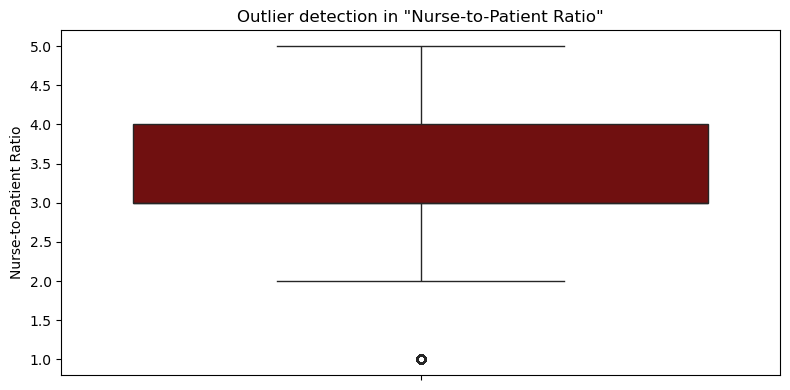

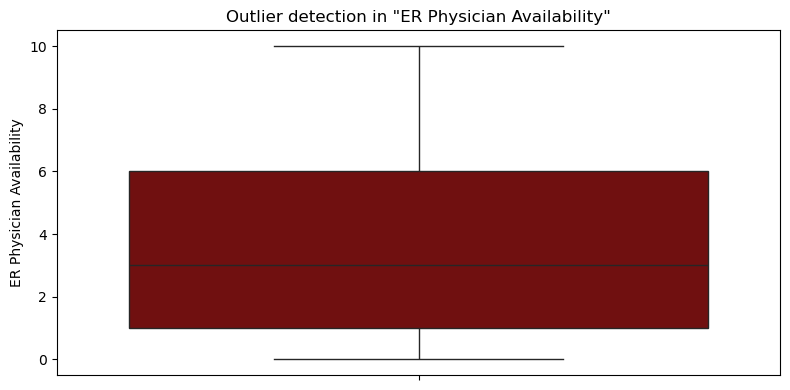

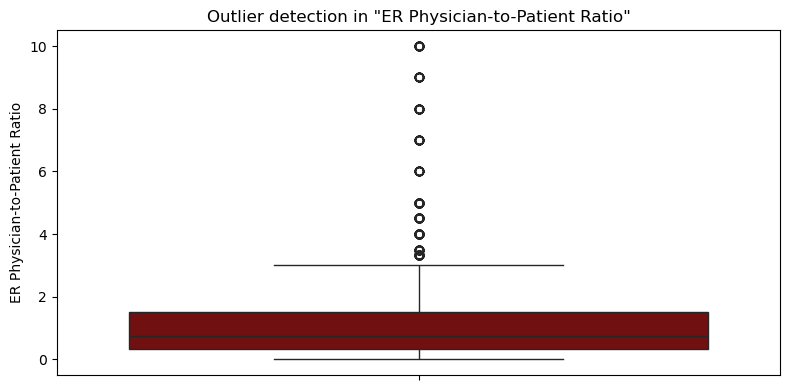

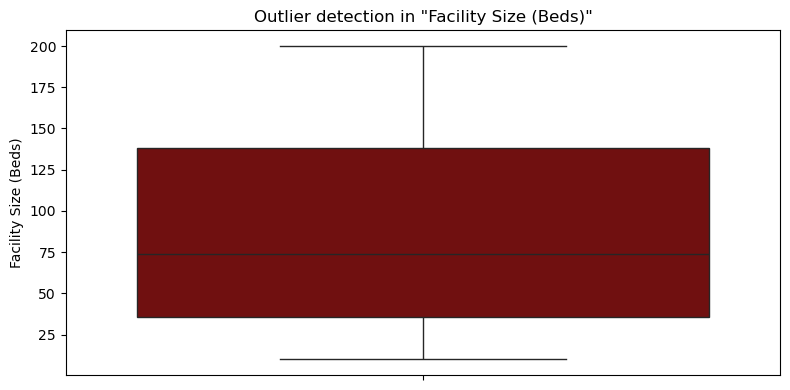

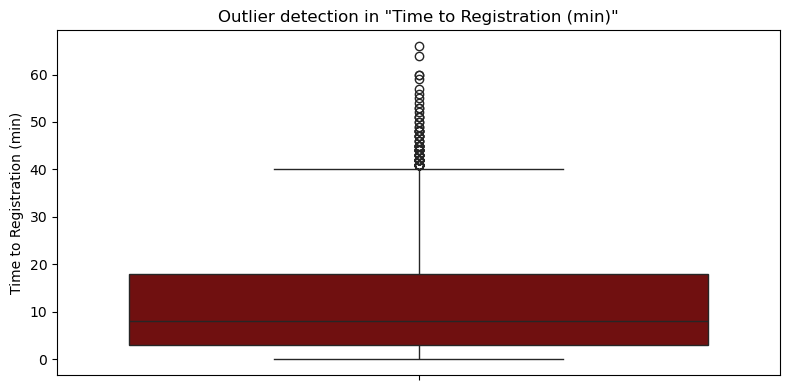

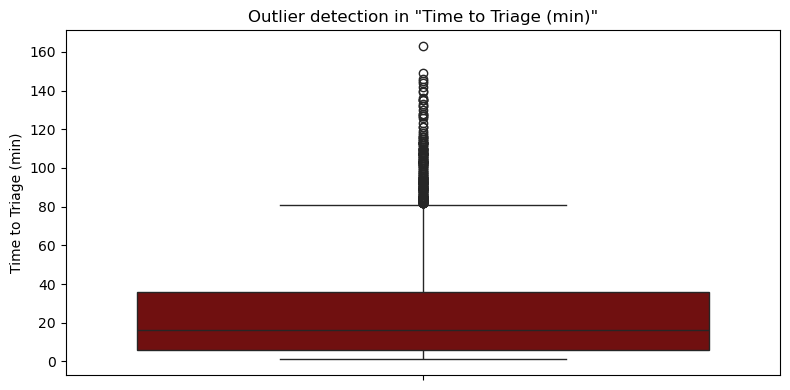

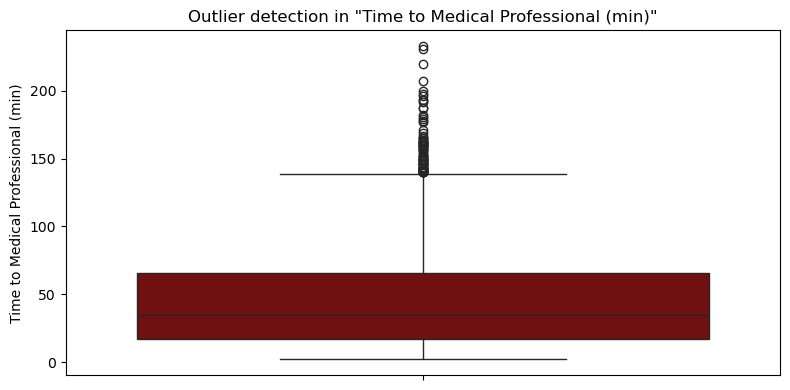

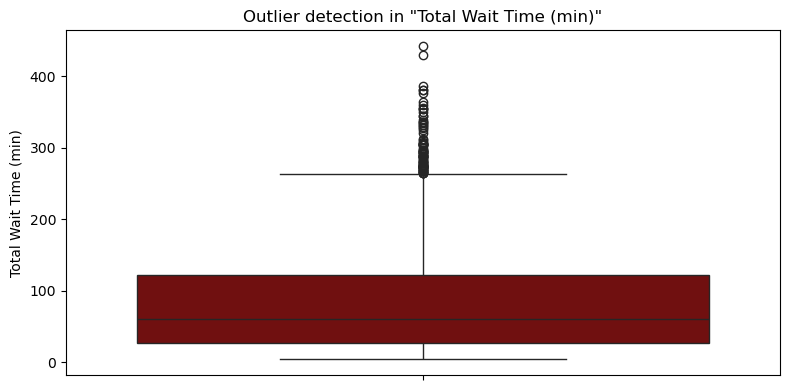

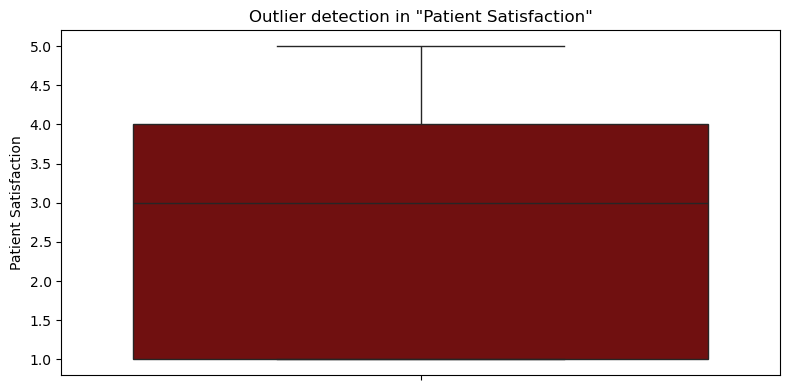

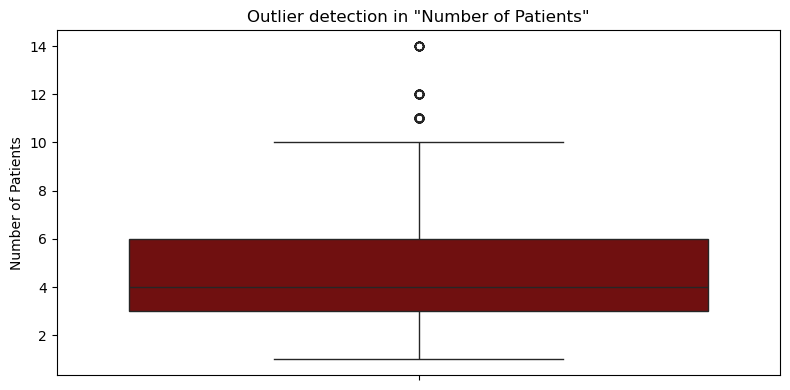

In [26]:
for col in correlacion2.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=wait, y=col, color='maroon', )
    plt.title(f'Outlier detection in "{col}"')
    plt.tight_layout()
    plt.show();

In [27]:

#más pacientes hay en la evening
# chekear si el num de profesionales y nurse es más alto también

In [28]:
df_hospital_name = wait.groupby("Hospital Name")["Patient Satisfaction"].mean().reset_index()
df_hospital_name

,Hospital Name,Patient Satisfaction
0,Northside Community Hospital,2.808809
1,Riverside Medical Center,2.759531
2,Springfield General Hospital,2.731388
3,St. Mary’s Regional Health,2.775879
4,Summit Health Center,2.782609


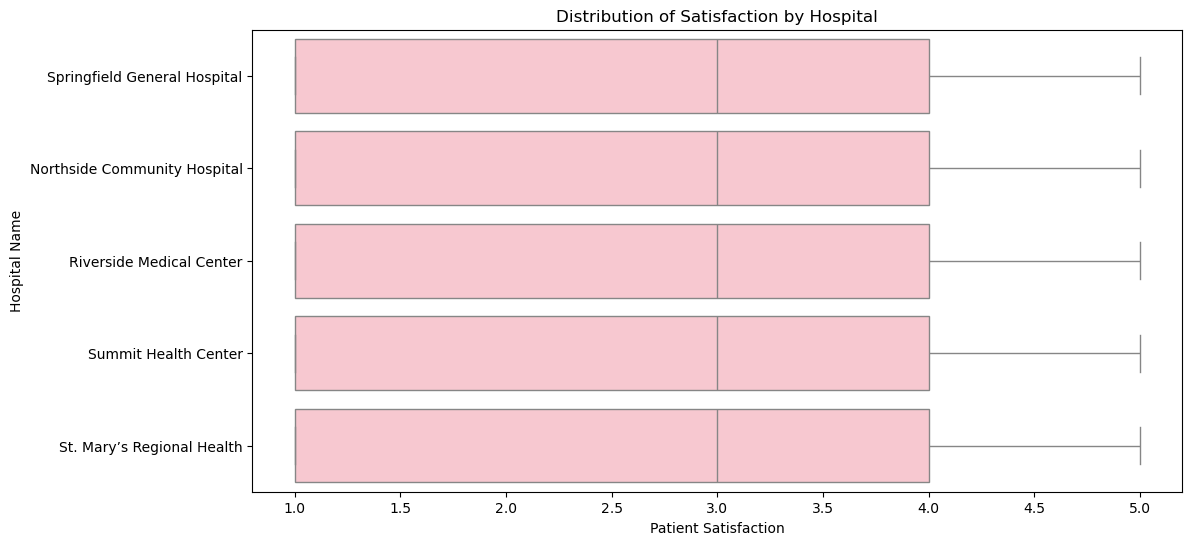

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=wait, x='Patient Satisfaction', y='Hospital Name', color='pink')
plt.title('Distribution of Satisfaction by Hospital');

In [30]:
#all hospitals have the same satisfaction

In [31]:
df_regional = wait.groupby("Region")["Patient Satisfaction"].mean().reset_index()
df_regional

,Region,Patient Satisfaction
0,Rural,2.792377
1,Urban,2.757818


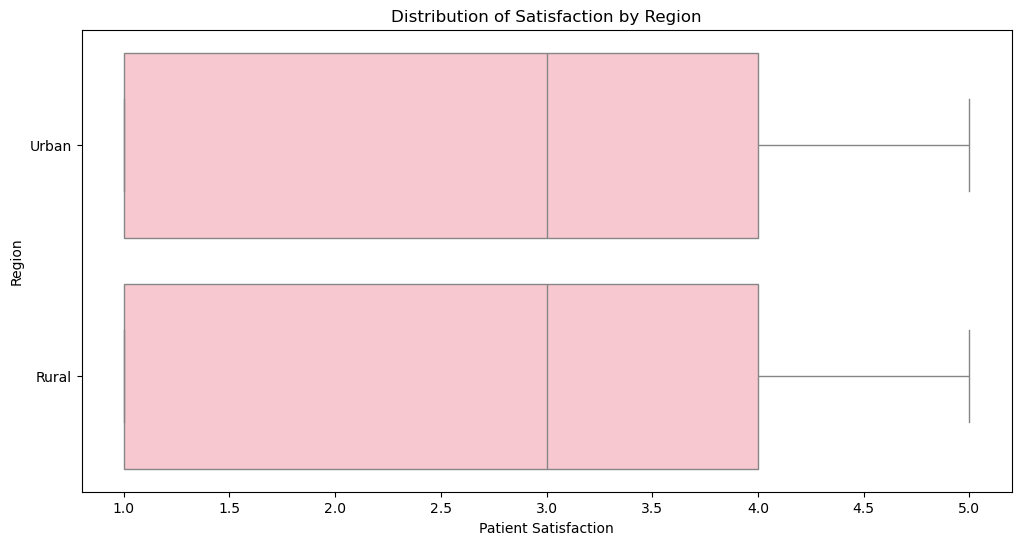

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=wait, x='Patient Satisfaction', y='Region', color='pink')
plt.title('Distribution of Satisfaction by Region');

In [33]:
#location doesn't affect satisfaction

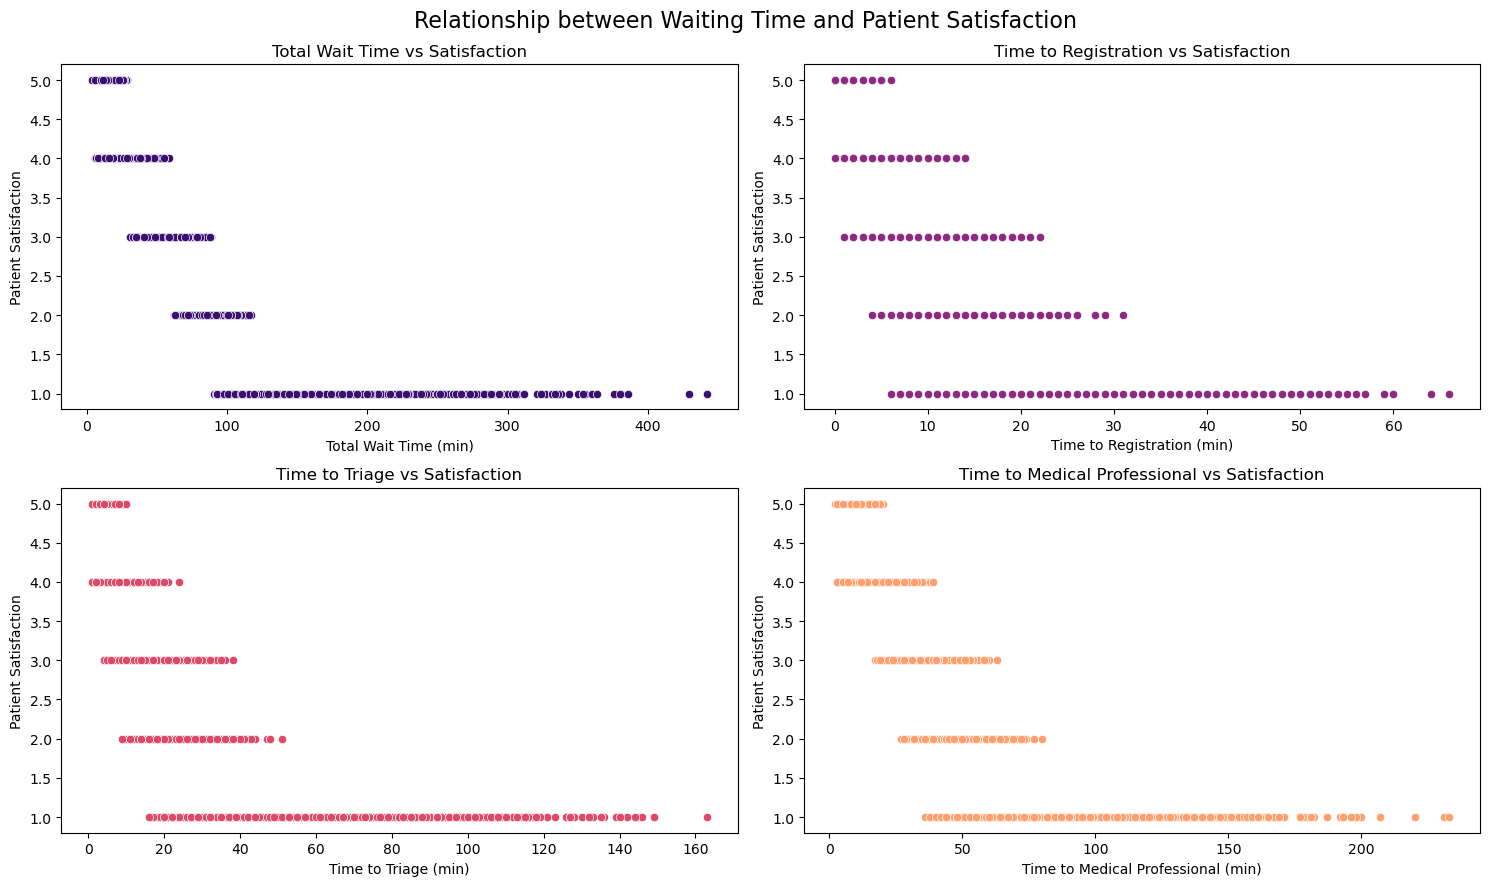

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))

palette = sns.color_palette("magma", 4)
sns.scatterplot(data=wait, 
                x='Total Wait Time (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[0],
                ax=axes[0,0])

sns.scatterplot(data=wait, 
                x='Time to Registration (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[1],
                ax=axes[0,1])

sns.scatterplot(data=wait, 
                x='Time to Triage (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[2],
                ax=axes[1,0])

sns.scatterplot(data=wait, 
                x='Time to Medical Professional (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[3],
                ax=axes[1,1])

axes[0,0].set_title('Total Wait Time vs Satisfaction')
axes[0,1].set_title('Time to Registration vs Satisfaction')
axes[1,0].set_title('Time to Triage vs Satisfaction')
axes[1,1].set_title('Time to Medical Professional vs Satisfaction')

plt.suptitle('Relationship between Waiting Time and Patient Satisfaction', fontsize=16)
plt.tight_layout();

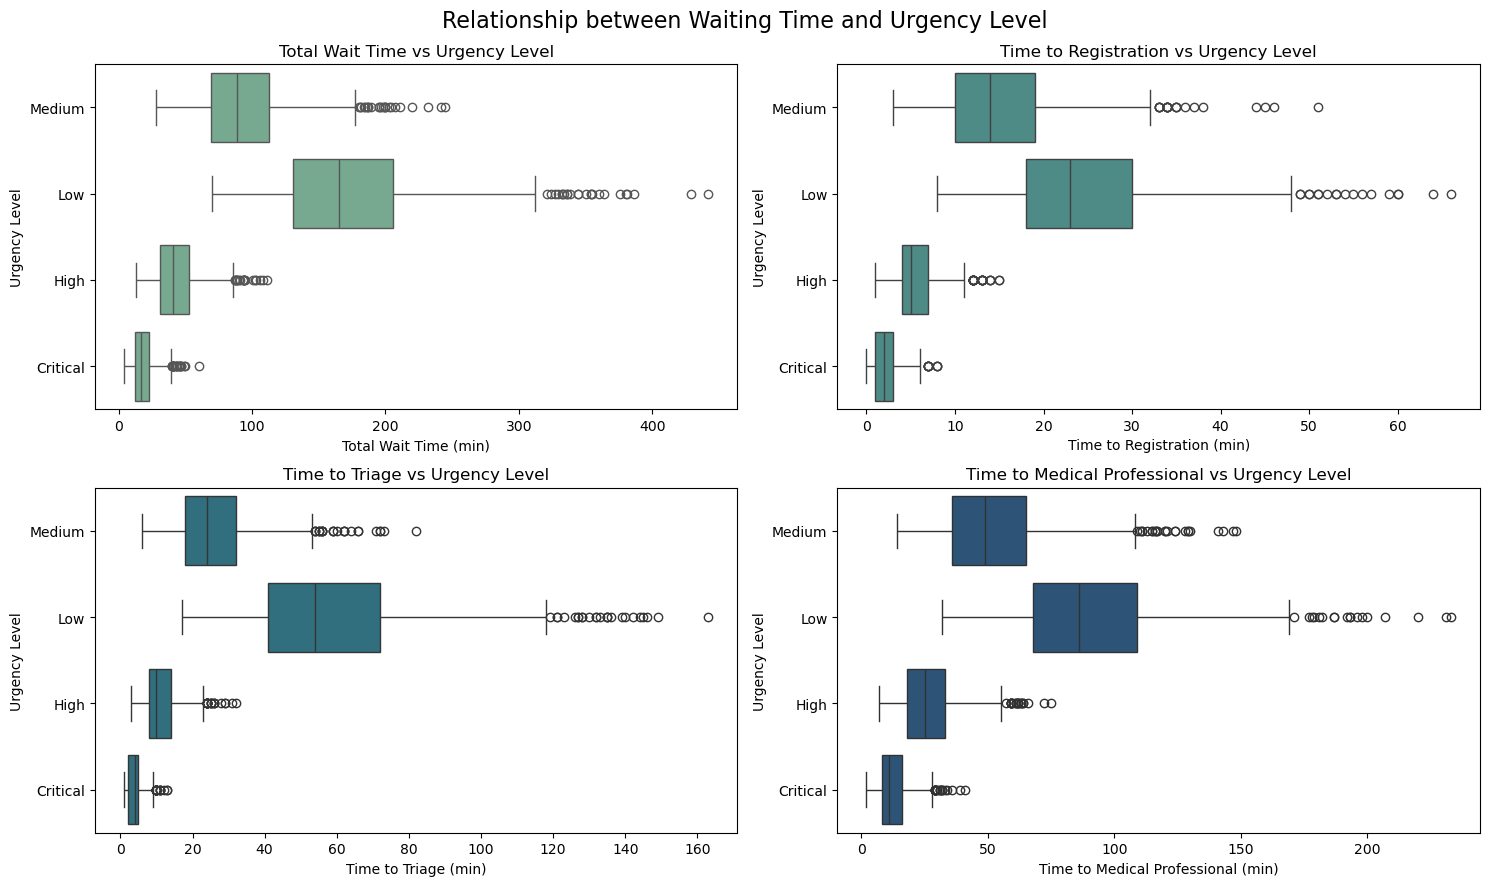

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))

palette = sns.color_palette("crest", 4)
sns.boxplot(data=wait, x='Total Wait Time (min)', y='Urgency Level', ax=axes[0,0], color=palette[0])

sns.boxplot(data=wait, x='Time to Registration (min)', y='Urgency Level', ax=axes[0,1], color=palette[1])

sns.boxplot(data=wait, x='Time to Triage (min)', y='Urgency Level', ax=axes[1,0], color=palette[2])

sns.boxplot(data=wait, x='Time to Medical Professional (min)', y='Urgency Level', ax=axes[1,1], color=palette[3])

axes[0,0].set_title('Total Wait Time vs Urgency Level')
axes[0,1].set_title('Time to Registration vs Urgency Level')
axes[1,0].set_title('Time to Triage vs Urgency Level')
axes[1,1].set_title('Time to Medical Professional vs Urgency Level')

plt.suptitle('Relationship between Waiting Time and Urgency Level', fontsize=16)
plt.tight_layout();

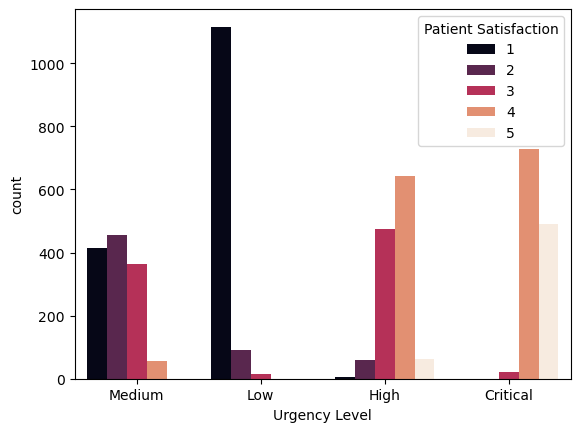

In [36]:
sns.countplot(x = "Urgency Level", hue = "Patient Satisfaction", data = wait, palette = "rocket");

In [37]:
# Filtrar solo los casos con Urgency Level = Medium
medium_urgency_df = wait[wait['Urgency Level'] == 'Medium'].copy()

# Verificar cuántos registros tienes
print(f"Número de registros con Urgency Level Medium: {len(medium_urgency_df)}")
print(medium_urgency_df['Patient Satisfaction'].value_counts())

Número de registros con Urgency Level Medium: 1291
Patient Satisfaction
2    455
1    416
3    363
4     57
Name: count, dtype: int64


In [38]:
medium_urgency_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nurse-to-Patient Ratio,1291.0,3.465531,0.499004,3.0,3.00,3.00,4.0,4.0
ER Physician Availability,1291.0,3.924090,3.110193,0.0,1.00,3.00,6.0,10.0
ER Physician-to-Patient Ratio,1291.0,1.256809,1.568811,0.0,0.33,0.75,1.5,10.0
Facility Size (Beds),1291.0,87.235476,59.071907,10.0,35.00,73.00,138.0,200.0
Time to Registration (min),1291.0,14.841208,6.932702,3.0,10.00,14.00,19.0,51.0
Time to Triage (min),1291.0,26.180480,10.865954,6.0,18.00,24.00,32.0,82.0
Time to Medical Professional (min),1291.0,52.673896,21.828999,14.0,36.00,49.00,65.0,148.0
Total Wait Time (min),1291.0,93.695585,33.766863,28.0,69.50,89.00,113.0,245.0
Patient Satisfaction,1291.0,2.047250,0.882262,1.0,1.00,2.00,3.0,4.0
Number of Patients,1291.0,4.421379,2.297078,1.0,3.00,4.00,6.0,14.0


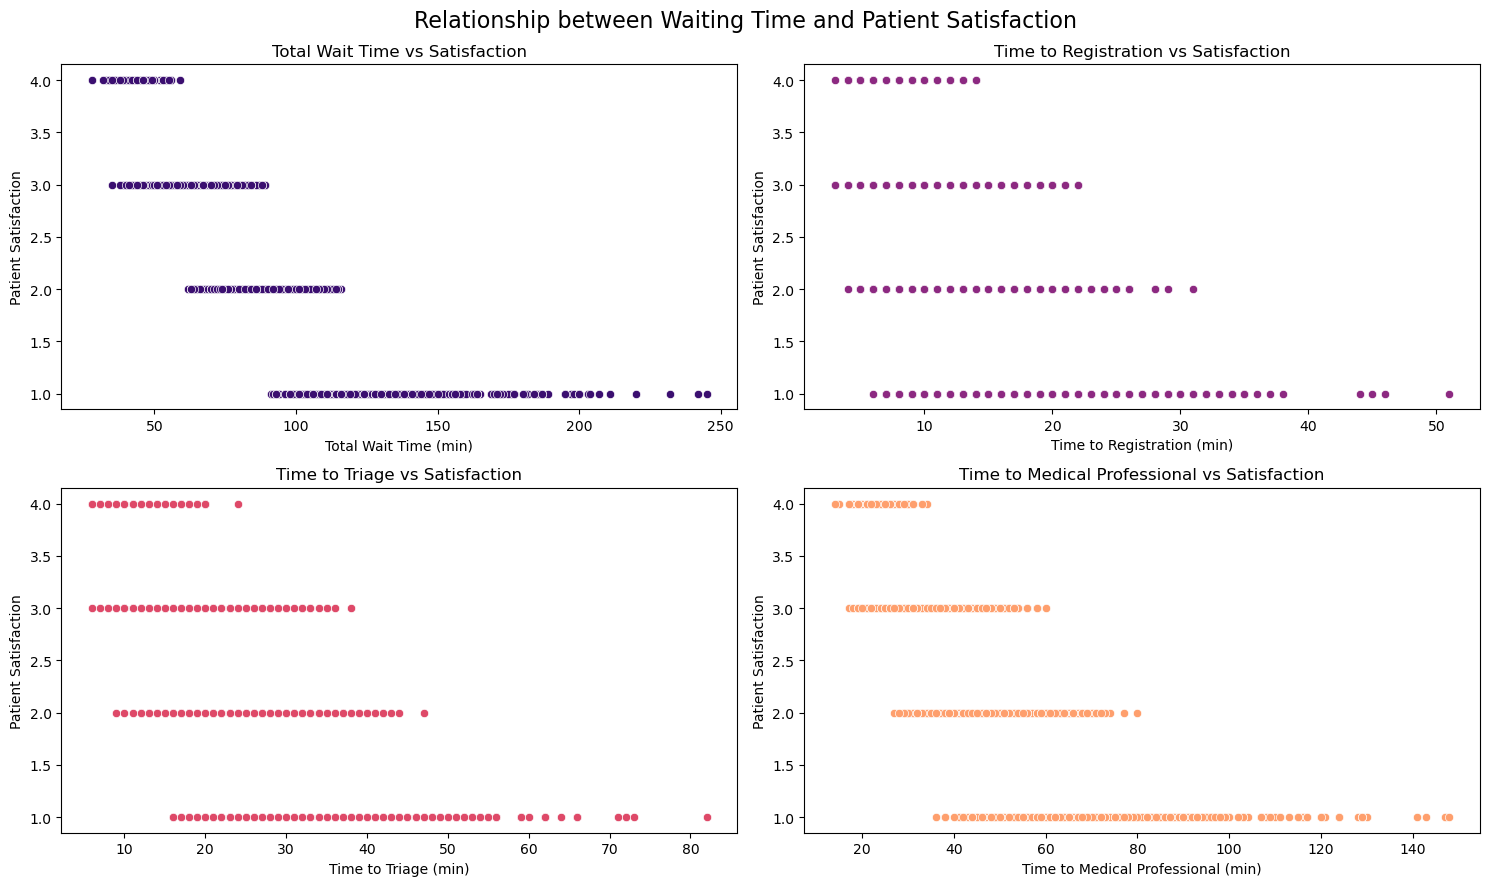

In [39]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))

palette = sns.color_palette("magma", 4)
sns.scatterplot(data=medium_urgency_df, 
                x='Total Wait Time (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[0],
                ax=axes[0,0])

sns.scatterplot(data=medium_urgency_df, 
                x='Time to Registration (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[1],
                ax=axes[0,1])

sns.scatterplot(data=medium_urgency_df, 
                x='Time to Triage (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[2],
                ax=axes[1,0])

sns.scatterplot(data=medium_urgency_df, 
                x='Time to Medical Professional (min)', 
                y='Patient Satisfaction', 
                alpha=1, 
                color=palette[3],
                ax=axes[1,1])

axes[0,0].set_title('Total Wait Time vs Satisfaction')
axes[0,1].set_title('Time to Registration vs Satisfaction')
axes[1,0].set_title('Time to Triage vs Satisfaction')
axes[1,1].set_title('Time to Medical Professional vs Satisfaction')

plt.suptitle('Relationship between Waiting Time and Patient Satisfaction', fontsize=16)
plt.tight_layout();

In [ ]:
wait.columns

Index(['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Region',
       'Visit Date', 'Visit Time', 'Day of Week', 'Season', 'Time of Day',
       'Urgency Level', 'Nurse-to-Patient Ratio', 'Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)', 'Time to Medical Professional (min)',
       'Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction'],
      dtype='object')

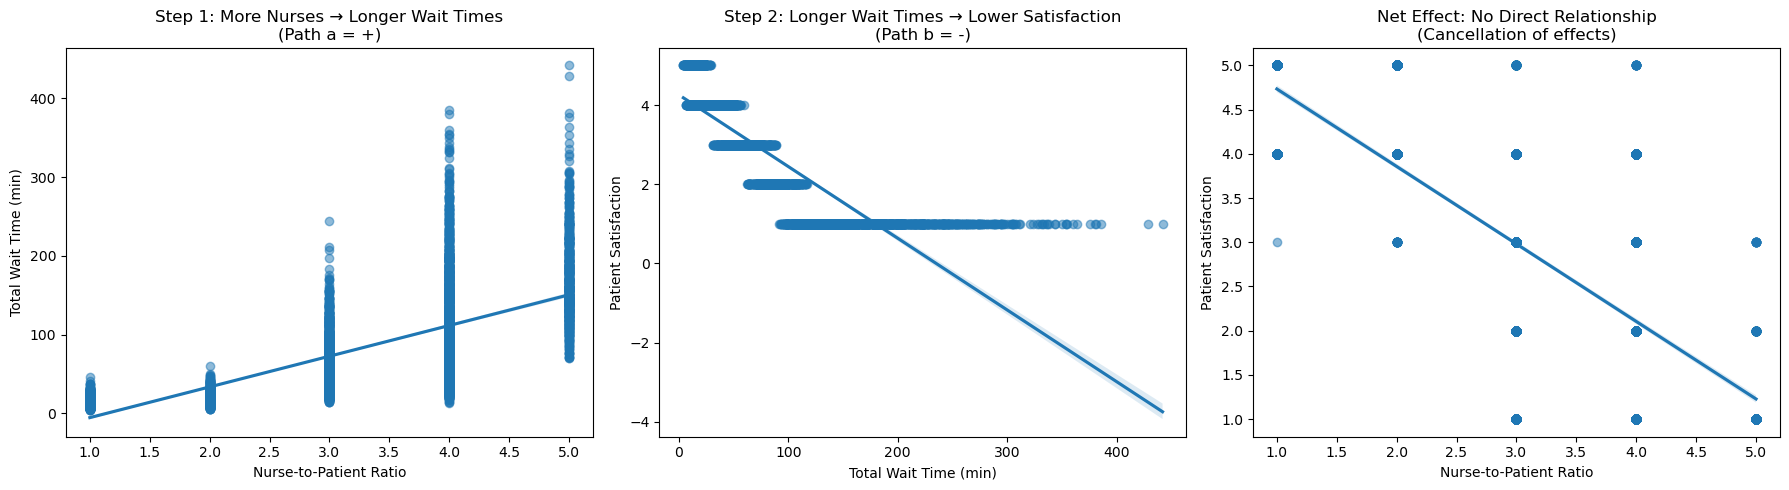

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Ratio → Wait Time
sns.regplot(data=wait, x='Nurse-to-Patient Ratio', y='Total Wait Time (min)', 
           ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title('Step 1: More Nurses → Longer Wait Times\n(Path a = +)')

# Plot 2: Wait Time → Satisfaction  
sns.regplot(data=wait, x='Total Wait Time (min)', y='Patient Satisfaction',
           ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title('Step 2: Longer Wait Times → Lower Satisfaction\n(Path b = -)')

# Plot 3: Net effect
sns.regplot(data=wait, x='Nurse-to-Patient Ratio', y='Patient Satisfaction',
           ax=axes[2], scatter_kws={'alpha':0.5})
axes[2].set_title('Net Effect: No Direct Relationship\n(Cancellation of effects)')

plt.tight_layout()
plt.show()